In [1]:
# 常用科学计算工具
import pandas as pd
# 数据集训练集划分
import seaborn as sns
from sklearn.model_selection import train_test_split
# 对特征进行标准化处理（特征缩放）
from sklearn.preprocessing import StandardScaler
# 画图用
import matplotlib.pyplot as plt
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression
# 常用科学计算工具
import numpy as np
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
# 支持中文格式
from pylab import mpl
# 比较不同模型
from sklearn import linear_model
# 将字符串转换为整数型，数据处理
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
"""
# 数据集说明
# | names file (C4.5 format) for car evaluation domain
#
# | class values
#
# unacc, acc, good, vgood
#
# | attributes
#
# buying:   vhigh, high, med, low.
# maint:    vhigh, high, med, low.
# doors:    2, 3, 4, 5more.
# persons:  2, 4, more.
# lug_boot: small, med, big.
# safety:   low, med, high.
"""


# 参考网站
# https://blog.csdn.net/weixin_42823019/article/details/112506287
name = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

def load_data():
    """:cvar
    @:param：
    @:return:
    """
    data = pd.read_csv('./data/car data.csv', names=name)
    print(data)
    for i in data.columns:
        print(data[i].unique(), "\t", data[i].nunique())

    sns.countplot(x=data['class'])
    plt.show()
    le = LabelEncoder()
    for i in data.columns:
        data[i] = le.fit_transform(data[i])
    X = data[data.columns[:-1]]
    y = data['class']  # 标签
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=10)

    return X_train, X_test, y_train, y_test


def test_skl_LR(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))



    # 加载数据


     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]
['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


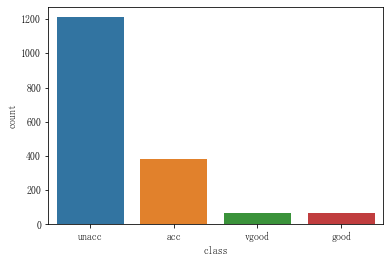

In [2]:
    # 设置支持中文字体
    mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    X_train, X_test, y_train, y_test = load_data()



In [3]:
    print("dimensions of train: {}".format(X_train.shape))
    print("dimensions of test: {}".format(X_test.shape))

dimensions of train: (1382, 6)
dimensions of test: (346, 6)


In [4]:
    train=X_train
    train['class']=y_train

In [5]:
    train.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,1.502171,1.512301,1.510130,1.008683,0.995658,0.998553,1.530391
std,1.122314,1.121604,1.117097,0.816155,0.819730,0.817972,0.883604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [6]:
    train.head()
    

,buying,maint,doors,persons,lug_boot,safety,class
153,3,0,1,2,2,1,2
1333,1,3,1,1,2,2,2
1509,1,0,3,2,0,1,2
703,0,2,2,0,2,2,2
1672,1,1,1,2,0,2,1


In [7]:
train['class'].value_counts()

2    959
0    320
1     56
3     47
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

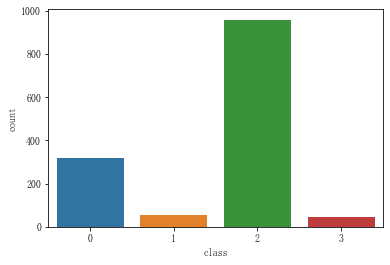

In [8]:
sns.countplot(train['class'])

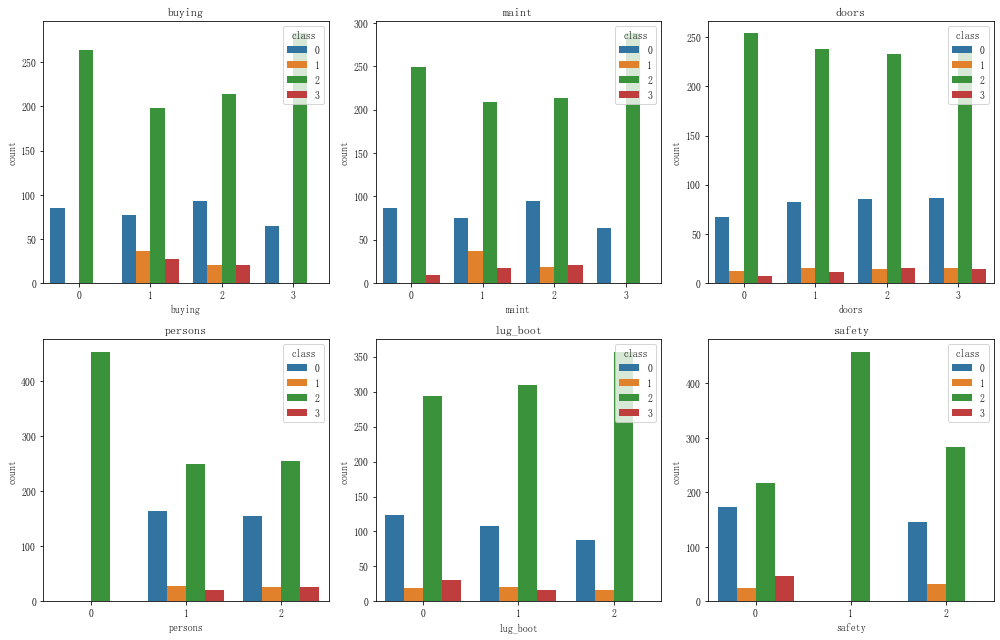

In [9]:
cols=['buying','maint', 'doors', 'persons', 'lug_boot','safety']
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_rows*7,n_cols*3))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if(i<6):
            ax=axs[r][c]
            sns.countplot(train[cols[i]],hue=train['class'],ax=ax)
            ax.set_title(cols[i])
            ax.legend(title='class',loc='upper right')
plt.tight_layout()

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]
['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


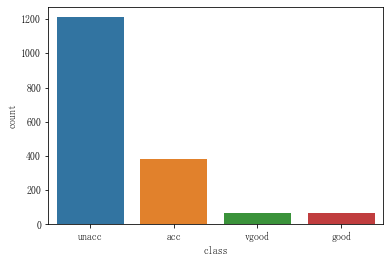

在测试集上预测的准确率: 0.71


In [10]:
X_train, X_test, y_train, y_test = load_data()
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('在测试集上预测的准确率: {:.2f}'.format(lr.score(X_test, y_test)))

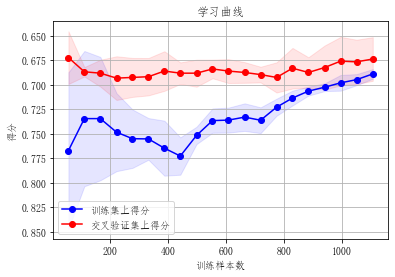

(0.6725722342595044, 0.04240030410299622)

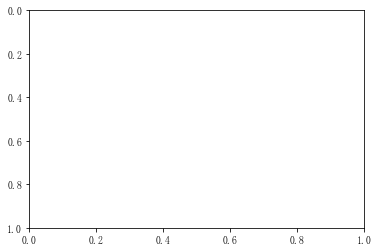

In [11]:

from sklearn.model_selection import learning_curve 
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
 
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
 
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
 
        plt.legend(loc="best")
 
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
 
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
 
    
plot_learning_curve(lr, u"学习曲线", X_train, y_train)

In [12]:
from imblearn.over_sampling import SMOTE    #过采样避免数据不平衡
from sklearn.model_selection import train_test_split
from collections import Counter        #计数,分类统计好各种类别的数量
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,fbeta_score,precision_recall_curve#混合矩阵、准确度、精确度、召回率、f值、精确度与召回率曲线
from sklearn.model_selection import cross_val_score    
from sklearn.model_selection import GridSearchCV     #网格自动调参

import warnings    #忽略warning
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [13]:
print('过采样之前训练集中正负样本的比例分布:')
print(y_train[y_train==2].value_counts())
print(y_train[y_train==2].value_counts()/len(y_train))
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=name )
os_data_y= pd.DataFrame(data=os_data_y,columns=['class'])
print('-------------------------------------------')
print('过采样之后训练集中正负样本的比例分布:')
print(y_train[y_train==0].value_counts())
print(y_train[y_train==0].value_counts()/len(y_train))

过采样之前训练集中正负样本的比例分布:
2    959
Name: class, dtype: int64
2    0.693922
Name: class, dtype: float64
-------------------------------------------
过采样之后训练集中正负样本的比例分布:
0    320
Name: class, dtype: int64
0    0.231548
Name: class, dtype: float64


In [15]:
os_data_X=os_data_X.drop(['class'],axis=1)

In [19]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
 
logreg = LogisticRegression()
 
rfe = RFE(logreg,6)#选择20个特征
rfe = rfe.fit(os_data_X.values, os_data_y.values.ravel())
 
features = list(os_data_X.columns[rfe.support_])
 
print('原特征数量:',os_data_X.shape[1])
print()
print('经过模型筛选后的6个特征：')
print(features)
print()
print('特征排名:')
print(rfe.ranking_)

原特征数量: 6

经过模型筛选后的3个特征：
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

特征排名:
[1 1 1 1 1 1]


In [20]:
X=os_data_X[features]
y=os_data_y['class']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
 
#在测试集上进行预测
y_pred = logreg.predict(X_test)
print('在测试集上预测的准确率: {:.2f}'.format(logreg.score(X_test, y_test)))

在测试集上预测的准确率: 0.55
